In [1]:
pip install pandas matplotlib wordcloud scikit-learn torch transformers



   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------------------------------ --------- 8.9/11.6 MB 50.3 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.6 MB 25.9 MB/s eta 0:00:01
   -------------------------------------- - 11.3/11.6 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 5.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 5.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.8 MB/s eta 0:00:00
   ----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] T

                                               title  \
0  Aanlisis Prediksi Kemampuan Pembayaran Klien H...   
1  Akses Kendaraan pada Perumahan menggunakan Blu...   
2  Alasan Penurunan Popularitas dari Video Game F...   
3  Alat Monitoring Pertanian Padi Dengan Sistem L...   
4  Alat Ukur Berat dan Volume Buah Menggunakan Mu...   

                                             penulis  \
0   Abrilian Maulidhia, Bayu Rahayudi, Welly Purnomo   
1                    Zulfi Alfariz, Agung Setia Budi   
2  Arif Bagus Setiawan, Ismiarta Aknuranda, Andi ...   
3  Stanislaus Angeswara, Agung Setia Budi, S.T., ...   
4                                 Crystina Wijayanti   

                                       cleaned_title  
0  aanlisis prediksi kemampuan pembayaran klien h...  
1  akse kendaraan pada perumahan menggunakan blue...  
2  alasan penurunan popularitas dari video game f...  
3  alat monitor pertanian padi dengan sistem low ...  
4  alat ukur berat dan volume buah menggunakan mu..

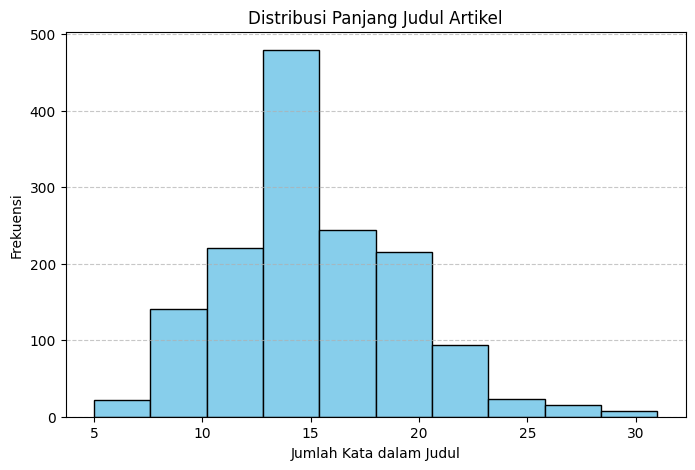

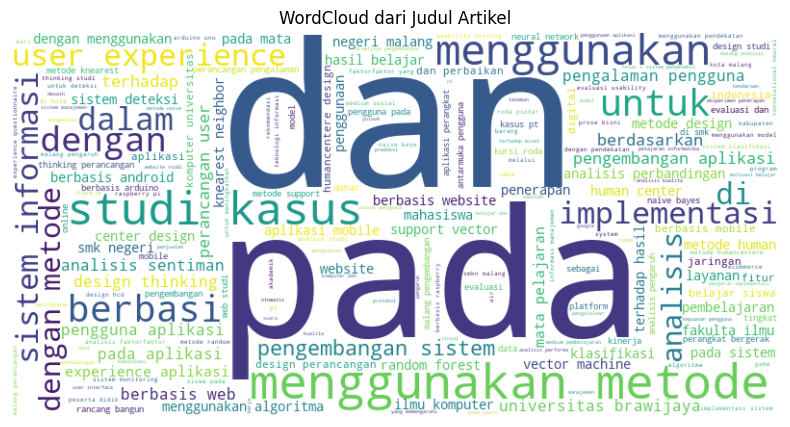

TF-IDF Shape: (1460, 100)
BERT Embedding Shape: torch.Size([1, 768])
✅ Semua proses selesai!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch

# ======= 1️⃣ Load Data CSV =======
file_path = "D:/MLOPs/data/JPTIIK_cleaned.csv"  # Ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Pastikan kolom yang digunakan tersedia
df.columns = df.columns.str.strip().str.lower()

# Cek beberapa baris pertama
print(df.head())

# ======= 2️⃣ Analisis Statistik Dasar =======
df["panjang_judul"] = df["cleaned_title"].apply(lambda x: len(str(x).split()))

# Visualisasi distribusi panjang judul
plt.figure(figsize=(8, 5))
plt.hist(df["panjang_judul"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Jumlah Kata dalam Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Judul Artikel")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ======= 3️⃣ WordCloud =======
all_text = " ".join(df["cleaned_title"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Judul Artikel")
plt.show()

# ======= 4️⃣ Representasi Teks dengan TF-IDF =======
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Ambil 100 kata paling penting
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned_title"])

print("TF-IDF Shape:", tfidf_matrix.shape)

# ======= 5️⃣ Representasi Teks dengan BERT =======
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

example_text = df["cleaned_title"].iloc[0]
inputs = tokenizer(example_text, return_tensors="pt", truncation=True, padding=True, max_length=50)
with torch.no_grad():
    outputs = model(**inputs)

bert_embedding = outputs.last_hidden_state.mean(dim=1)  # Ambil rata-rata dari semua token
print("BERT Embedding Shape:", bert_embedding.shape)

print("✅ Semua proses selesai!")
